# Интерпретация языковый моделей, 2025

## В чем проблема?

**Зачем это надо?**

Сейчас очень активно развивается область больших (огромных!) нейросетевых моделей, которые содержат миллионы или даже миллиарды параметров. Особенно в сфере языковых моделей, где рост кол-ва параметров со временем почти экспоненциальный:

<img src="https://s10251.pcdn.co/wp-content/uploads/2024/10/2024-Alan-D-Thompson-AI-Bubbles-Planets-Rev-9.png">

К сожалению, все эти модели представляют для нас в чистом виде "черный ящик", так как мы знаем __как__ они работают (разработчики сами же написали все те операции, которые там внутри происходят, и потом о них нам рассказали), но не знаем __почему__. Именно на последний вопрос отчасти и пытается ответить область интерпретации моделей искусственного интеллекта. В том числе языковых.

<img src="https://media.licdn.com/dms/image/v2/D5612AQFdFw2HHGQWNQ/article-cover_image-shrink_600_2000/article-cover_image-shrink_600_2000/0/1710392054097?e=2147483647&v=beta&t=BSdWhHXfUf4M4k4qv7ixFKFUyrFzVqzRXGpxp977-yE"  width=500>

Есть и другой источник интереса к этой области - лингвисты: нам очень интересно, как именно язык устроен внутри модели, какие его особенности и закономерности она выучивает и использует (и похожи ли они на то, как мыслит человек).

<img src="https://gozdesahin.github.io/images/linspector.png">

**Что такое интерпретируемая модель?**

Здесь есть несколько вариантов определения:
- Модель, решение которой мы можем объяснить (или предсказать), используя ее внутреннее устройство
- Модель, работу которой мы можем смоделировать с помощью более простых систем (часто правил)
- Модель, которая может сама объяснить свое решение на естественном языке

При этом есть модели, интерпретируемые по умолчанию (правиловые, статистические или линейные), для которых мы в любых обстоятельствах либо имеем уже готовую интерпретацию, либо можем легко ее получить.

**Что такое хорошая интерпретация?**

<img src="https://www.unite.ai/wp-content/uploads/2023/11/SHAP.png">

- Понятная человеку?
- Вызывающая доверие?
- Соответствующая реальной логике модели?
- Имеющая высокое значение какой-то метрики?

**Как это можно оценить автоматически?**


## Не языковые модели

<img src="https://mriquestions.com/uploads/3/4/5/7/34572113/screenshot-2024-09-04-at-3-35-24-pm_orig.png">

## Пробинг

Часто выделяют три типа пробинга:
- Поведенческий: проверяем с помощью простой классификации, насколько модель вообще осведомлена об интересующей нас категории. Здесь важно правильно выбрать классификатор

<img src="https://static.cambridge.org/binary/version/id/urn:cambridge.org:id:binary:20240920053855882-0406:S1351324923000190:S1351324923000190_tab2.png?pub-status=live" width=500>

_Table 2. Average test accuracy over all languages by task and model_

[Источник](https://www.cambridge.org/core/journals/natural-language-engineering/article/morphosyntactic-probing-of-multilingual-bert-models)

- Корреляционный: смотрим, как разные варианты выражения категории взаимодействуют с конкретными слоями или даже активациями в модели

<img src="https://drive.google.com/uc?export=view&id=1eIofmKajy25LXAErXENbd3vkeJOezXs2" width=700>

[Источник](https://aclanthology.org/N19-1419/)

- Инвазивный: изменяем что-то в модели так, чтобы проверить нашу гипотезу о категории

Данные три вида обычно идут друг за другом, так как позволяют все более глубокий уровень исследования фичи.

## Механистическая интерпретация

Общая идея механистической интепретации заключается в следующем: мы не хотим ничего знать о лингвистических фичах, но хотим понять, как воздествовать на внутреннее состояние модели так, чтобы получать нужный нам результат. Но и фичи в широком смысле мы тоже хотим :)

Проблема в том, что нейроны полисемантичны, из-за чего это не так просто.

<img src="https://drive.google.com/uc?export=view&id=1DCPyP_vodhyZcJFvVt4YDRBqzsNvt4ed" width=900>


**Anthropic**

Посмотрим на классический Трансформер немного под другим углом:

<img src="https://drive.google.com/uc?export=view&id=1pi9a6iY9lOCaCwkT0U5sev52BGBUhPm6" width=900>

А теперь идея следующая: обучим автоэнкодер так, что он, будучи встроенным в модель после определенного слоя 1) переводит в высокоразмерное разреженное пространство с минимумом ненулевых координат у каждой точки и 2) восстанавливает с минимальными потерями.

<img src="https://drive.google.com/uc?export=view&id=17wuBUG78aHTQxt2MWlLdmhx1ea-p0a4c" width=500>

Оказывается, что подобный подход позволяет нам получить интерпретируемые фичи:

<img src="https://drive.google.com/uc?export=view&id=1ybCpWplQ456Ta4KNaWLEwfQs-TqnI3-2" width=900>

И на сайте https://www.neuronpedia.org/ можно найти готовые интерпетации для фичей в популярных моделях.

А еще можно связать несколько моделей вместе:

<img src="https://drive.google.com/uc?export=view&id=1_mreLeUDDOtUt021PZbIRA7pqAKKcv8Y" width=900>





## Практика

### Probing

### POS

In [1]:
!wget https://rusvectores.org/static/models/rusvectores4/RNC/ruscorpora_upos_skipgram_300_5_2018.vec.gz

--2025-12-18 09:50:59--  https://rusvectores.org/static/models/rusvectores4/RNC/ruscorpora_upos_skipgram_300_5_2018.vec.gz
Resolving rusvectores.org (rusvectores.org)... 129.240.189.200, 2001:700:112::200
Connecting to rusvectores.org (rusvectores.org)|129.240.189.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 199864398 (191M) [application/x-gzip]
Saving to: ‘ruscorpora_upos_skipgram_300_5_2018.vec.gz.1’

ruscorpora_upos_ski 100%[===================>] 190.61M  16.8MB/s    in 26s     

2025-12-18 09:51:25 (7.26 MB/s) - ‘ruscorpora_upos_skipgram_300_5_2018.vec.gz.1’ saved [199864398/199864398]



In [2]:
!pip install gensim -q

In [3]:
from gensim.models import KeyedVectors
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [4]:
model = KeyedVectors.load_word2vec_format('ruscorpora_upos_skipgram_300_5_2018.vec.gz')

In [5]:
posses = ['NOUN', 'VERB', 'ADJ', 'ADV']

def get_tasks(model, n=10000):
    tasks = []
    vecs = []
    for item in model.index_to_key:
        if len(tasks) >= n:
            break

        word, pos = item.split('_')
        if pos in posses:
            tasks.append((word, pos))
            vecs.append(model[item])

    return (
        pd.DataFrame(tasks, columns=['word', 'pos']),
        np.vstack(vecs)
    )

In [6]:
df, vecs = get_tasks(model)
print(df.shape, vecs.shape)
df.head()

(10000, 2) (10000, 300)


,word,pos
0,мочь,VERB
1,год,NOUN
2,человек,NOUN
3,сказать,VERB
4,говорить,VERB


In [7]:
df.pos.value_counts()

,count
pos,
NOUN,4800
VERB,2557
ADJ,1913
ADV,730


In [8]:
train_df, test_df, train_vec, test_vec = train_test_split(df, vecs,
                                                          test_size=0.25,
                                                          random_state=42)

clf = LogisticRegression()
clf.fit(train_vec, train_df.pos);

In [9]:
preds = clf.predict(test_vec)
print(classification_report(test_df.pos, preds))

              precision    recall  f1-score   support

         ADJ       0.96      0.92      0.94       501
         ADV       0.92      0.81      0.86       195
        NOUN       0.96      0.99      0.97      1191
        VERB       0.96      0.97      0.96       613

    accuracy                           0.96      2500
   macro avg       0.95      0.92      0.93      2500
weighted avg       0.95      0.96      0.95      2500



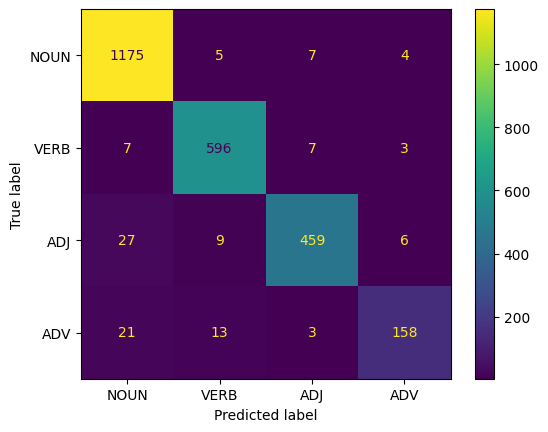

In [10]:
matrix = confusion_matrix(test_df.pos, preds, labels=test_df.pos.unique(), normalize=None)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=test_df.pos.unique())
disp.plot();

### Gender

In [11]:
!pip install pymorphy3 -q

In [12]:
from pymorphy3 import MorphAnalyzer

morph = MorphAnalyzer()

In [13]:
def get_tasks_gender(model, n=10000):
    tasks = []
    vecs = []
    for item in model.index_to_key:
        if len(tasks) >= n:
            break

        word, pos = item.split('_')

        if pos == 'NOUN':
            gender = morph.parse(word)[0].tag.gender
            if gender is not None:
                tasks.append((word, gender))
                vecs.append(model[item])

    return (
        pd.DataFrame(tasks, columns=['word', 'gender']),
        np.vstack(vecs)
    )

In [14]:
df, vecs = get_tasks_gender(model)
print(df.shape, vecs.shape)
df.head()

(10000, 2) (10000, 300)


,word,gender
0,год,masc
1,человек,masc
2,время,neut
3,дело,neut
4,день,masc


In [15]:
df.gender.value_counts()

,count
gender,
masc,4550
femn,3651
neut,1799


In [16]:
train_df, test_df, train_vec, test_vec = train_test_split(df, vecs,
                                                          test_size=0.25,
                                                          random_state=42)

clf = LogisticRegression()
clf.fit(train_vec, train_df.gender);

In [17]:
preds = clf.predict(test_vec)
print(classification_report(test_df.gender, preds))

              precision    recall  f1-score   support

        femn       0.65      0.67      0.66       917
        masc       0.72      0.75      0.74      1166
        neut       0.77      0.65      0.70       417

    accuracy                           0.70      2500
   macro avg       0.72      0.69      0.70      2500
weighted avg       0.71      0.70      0.70      2500



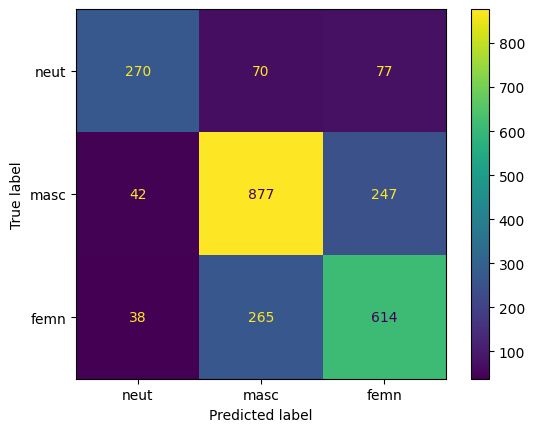

In [18]:
labels = test_df.gender.unique()
matrix = confusion_matrix(test_df.gender, preds, labels=labels, normalize=None)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=labels)
disp.plot();

In [19]:
test_df['pred'] = preds
test_df[test_df.pred != test_df.gender].groupby(['gender', 'pred']).sample(5, random_state=42)

,word,gender,pred
8281,невиновность,femn,masc
7405,клавиатура,femn,masc
6608,дворня,femn,masc
4747,лопасть,femn,masc
9753,крестины,femn,masc
9966,легализация,femn,neut
3948,неизвестность,femn,neut
8773,выделка,femn,neut
5648,погрешность,femn,neut
2045,кончина,femn,neut


## Литература

- [Distill Circuits Thread](https://distill.pub/2020/circuits/)
- [Transformer Circuits Thread](https://transformer-circuits.pub/)
- [Диссертация О. Серикова](https://www.hse.ru/data/xf/573/060/2142/%D0%A1%D0%B5%D1%80%D0%B8%D0%BA%D0%BE%D0%B2_%D0%94%D0%B8%D1%81%D1%81%D0%B5%D1%80%D1%82%D0%B0%D1%86%D0%B8%D1%8F.pdf)